### More Regression Models : BFP - 1 Feature

In [1]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#load data
data = pd.read_excel('Data Collection\BFP.xlsx', sheet_name='Combined')

#Create a new column
data['Crude_Rands'] = (data.Avg_Brent_Crude * data.Ex_Rate)

# Remove the outlier which is less that 350 
#data = data.loc[(data['BFP'] > 350)]

print(data.head())

# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = data['Crude_Rands'].values, data['BFP']

# Split data 80%-20% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

        Date      BFP  Ex_Rate  Avg_Brent_Crude  Petrol  Crude_Rands
0 2010-01-01  406.263   7.5246            74.31   786.0   559.153026
1 2010-02-01  424.263   7.4735            76.84   804.0   574.263740
2 2010-03-01  430.563   7.6902            73.17   810.3   562.691934
3 2010-04-01  453.063   7.4753            78.89   858.3   589.726417
4 2010-05-01  465.063   7.3749            85.75   871.8   632.397675
Training Set: 117 rows
Test Set: 30 rows


# Try Other Linear Algorithm

### 1. Lasso

Lasso() 

MSE: 1298.9504115395357
RMSE: 36.04095464245552
R2: 0.9430820905598756


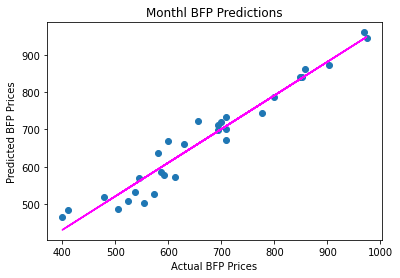

In [2]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train.reshape(-1, 1), y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test.reshape(-1, 1))
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual BFP Prices')
plt.ylabel('Predicted BFP Prices')
plt.title('Monthl BFP Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### 2. Decision Tree Algorithm

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train.reshape(-1, 1), y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_0 <= 871.13
|   |--- feature_0 <= 594.67
|   |   |--- feature_0 <= 427.13
|   |   |   |--- value: [274.77]
|   |   |--- feature_0 >  427.13
|   |   |   |--- feature_0 <= 514.25
|   |   |   |   |--- feature_0 <= 505.09
|   |   |   |   |   |--- value: [556.97]
|   |   |   |   |--- feature_0 >  505.09
|   |   |   |   |   |--- value: [487.97]
|   |   |   |--- feature_0 >  514.25
|   |   |   |   |--- feature_0 <= 556.32
|   |   |   |   |   |--- feature_0 <= 538.84
|   |   |   |   |   |   |--- value: [392.77]
|   |   |   |   |   |--- feature_0 >  538.84
|   |   |   |   |   |   |--- value: [396.56]
|   |   |   |   |--- feature_0 >  556.32
|   |   |   |   |   |--- feature_0 <= 570.55
|   |   |   |   |   |   |--- feature_0 <= 565.74
|   |   |   |   |   |   |   |--- feature_0 <= 558.60
|   |   |   |   |   |   |   |   |--- feature_0 <= 557.36
|   |   |   |   |   |   |   |   |   |--- value: [448.67]
|   |   |   |   |   |   |   |   |--- feature_0 >  557.36
|  

MSE: 4578.407780699999
RMSE: 67.6639326428785
R2: 0.7993815644332533


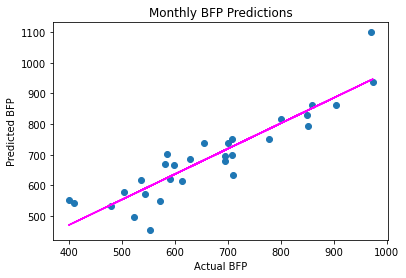

In [4]:
# Evaluate the model using the test data
predictions = model.predict(X_test.reshape(-1, 1))
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual BFP')
plt.ylabel('Predicted BFP')
plt.title('Monthly BFP Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### 3. Ensemble Algorithm

RandomForestRegressor() 

MSE: 2691.188128318089
RMSE: 51.87666265593894
R2: 0.8820764820479949


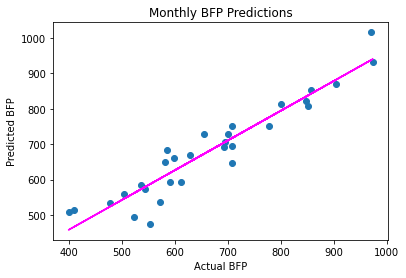

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train.reshape(-1, 1), y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test.reshape(-1, 1))
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual BFP')
plt.ylabel('Predicted BFP')
plt.title('Monthly BFP Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### 4. Gradient Boosting Algorithm

GradientBoostingRegressor() 

MSE: 3312.8639926793594
RMSE: 57.55748424557279
R2: 0.8548356495770404


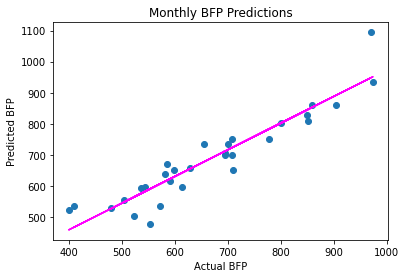

In [6]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a gradient boosting model on the training set
model = GradientBoostingRegressor().fit(X_train.reshape(-1, 1), y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test.reshape(-1, 1))
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual BFP')
plt.ylabel('Predicted BFP')
plt.title('Monthly BFP Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### Summary

In [7]:
df = pd.DataFrame({'Lasso' : [1298, 36.04 , 0.9431],
                   'Decision Treee' : [4578 ,67.66, 0.7997],
                   'Ensemble' : [2573, 50.53, 0.8873],
                   'Gradient Boosting' : [3312, 57.56, 0.8548]},
                   index=['MSE', 'RMSE', 'R2'])


print(df.to_markdown()) 

|      |     Lasso |   Decision Treee |   Ensemble |   Gradient Boosting |
|:-----|----------:|-----------------:|-----------:|--------------------:|
| MSE  | 1298      |        4578      |  2573      |           3312      |
| RMSE |   36.04   |          67.66   |    50.53   |             57.56   |
| R2   |    0.9431 |           0.7997 |     0.8873 |              0.8548 |


Its clearly evident that both the Linear Regression and the Lasso algorithm gives the best results